In [9]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as const

from cluster_functions import temp_from_luminosity

In [2]:
def gaspari_temp(L500):
    exp = (np.log10(L500/(1e44*u.erg/u.s)) + 2.34)/4.71
    temp = np.power(10, exp) * u.keV
    return temp.to(u.GeV)

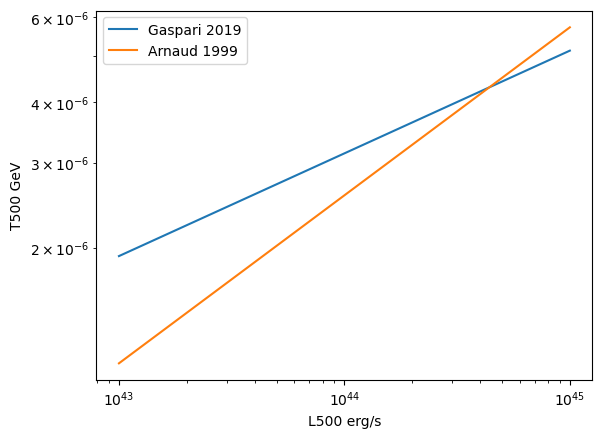

In [13]:
L500s = np.logspace(-1, 1)*1e44*u.erg/u.s
plt.loglog(L500s, gaspari_temp(L500s), label="Gaspari 2019")
plt.loglog(L500s, temp_from_luminosity(L500s), label="Arnaud 1999")

plt.xlabel("L500 erg/s")
plt.ylabel("T500 GeV")

plt.legend()